<a href="https://colab.research.google.com/github/VenkyMK/MPNeuronPerceptronEvaluation/blob/master/MPNeuronPerceptronEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Purpose of the exercise

1.   Change the test and training size values and study the corresponding impact
2.   Change the threshold of the binarisation and study the corresponding impact
3.   Plot the parameter space in the X-axis and Accuracy (Train and Test) in the Y-axis and study the same
4.   Changing the hyper parameters, different combinations of epochs and learning rate and study the same
5.   Use random initializer for w and b, Use seed to re-produce the scenario
6.   Use animated plots and check if it could be applied for any of the hyperparameters

##Loading Dataset


1.   The data set is loaded into input and output arrays
2.   The attributes of the data such as shape, contents and so on is seen to understand the data







In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [0]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
print(X.shape, Y.shape)

(569, 30) (569,)


## Data to Pandas DataFrame



1.   The data is loaded into the pandas dataframe with columns as the feature names
2.   The attributes of the data is checked



In [0]:
import pandas as pd

In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target

In [0]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


##Train Test Split
The first requirement is to play with the test and training split size values:

1.   Change the test and training size split values and study the corresponding impact





In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

In [0]:
type(X)

pandas.core.frame.DataFrame

In [0]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
def set_train_test_split_values(size):
  X_train = []
  X_test = []
  Y_train = []
  Y_test = []
  for value in size:
    a,b,c,d = train_test_split(X, Y, test_size=value, stratify = Y, random_state=1)
    X_train.append(a)
    X_test.append(b)
    Y_train.append(c)
    Y_test.append(d)
  return X_train, X_test, Y_train, Y_test

In [0]:
train_test_split_values = [0.1, 0.15, 0.2, 0.25]
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = set_train_test_split_values(train_test_split_values)

In [0]:
print(X_train_multi[0].shape, X_test_multi[0].shape, X.shape)
print(X_train_multi[1].shape, X_test_multi[1].shape, X.shape)
print(X_train_multi[2].shape, X_test_multi[2].shape, X.shape)
print(X_train_multi[3].shape, X_test_multi[3].shape, X.shape)

(512, 30) (57, 30) (569, 30)
(483, 30) (86, 30) (569, 30)
(455, 30) (114, 30) (569, 30)
(426, 30) (143, 30) (569, 30)


In [0]:
print(Y_train_multi[0].shape, Y_test_multi[0].shape, Y.shape)
print(Y_train_multi[1].shape, Y_test_multi[1].shape, Y.shape)
print(Y_train_multi[2].shape, Y_test_multi[2].shape, Y.shape)
print(Y_train_multi[3].shape, Y_test_multi[3].shape, Y.shape)

(512,) (57,) (569,)
(483,) (86,) (569,)
(455,) (114,) (569,)
(426,) (143,) (569,)


## Binarisation of the Input

The second requirement is to play with the binarisation threshold values:

1.   Change the threshold value and study the corresponding impact

In [0]:
#def binarisation_manual(input):
  #Input_binarised = []
  #for value in input:
    #Input_binarised.append(value.apply(pd.cut, bins=2, labels=[1,0]))
  #return Input_binarised

In [0]:
def binarisation_manual(input):
  input1 = input
  binary_output = []
  for value in input1:
    #print(value.shape)
    x = len(value.columns)
    #print(x)
    a = list(value.columns)
    #print(a)
    for i in range(x):
      #print(i)
      #b = value.max(axis=0)[i]
      b = value.mean(axis=0)[i]
      #print(b)
      #c = int(b/2)
      c = int(b)
      #print(c)
      d = a[i]
      #print(d)
      #value.loc[d].map(lambda x: 1 if x < c else 0)
      value.loc[:,d] = value.loc[:,d].map(lambda x: 1 if x < c else 0)
      #value[:,d].map(lambda x: 1 if x < c else 0)
      #print(value[d])
    binary_output.append(value)
  #print(len(binary_output))
  return binary_output

In [0]:
#print(len(X_train_multi))
X_binarised_train = binarisation_manual(X_train_multi)
#print(X_binarised_train)
#print(X_binarised_train[0].shape, X_binarised_train[1].shape, X_binarised_train[2].shape, X_binarised_train[3].shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
X_binarised_test = binarisation_manual(X_test_multi)
#print(X_binarised_test)
#print(X_binarised_test[0].shape, X_binarised_test[1].shape, X_binarised_test[2].shape, X_binarised_test[3].shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
type(X_binarised_test[0])

pandas.core.frame.DataFrame

In [0]:
X_binarised_test[0] = X_binarised_test[0].values
X_binarised_train[0] = X_binarised_train[0].values
X_binarised_test[1] = X_binarised_test[1].values
X_binarised_train[1] = X_binarised_train[1].values
X_binarised_test[2] = X_binarised_test[2].values
X_binarised_train[2] = X_binarised_train[2].values
X_binarised_test[3] = X_binarised_test[3].values
X_binarised_train[3] = X_binarised_train[3].values

In [0]:
type(X_binarised_test[0])

numpy.ndarray

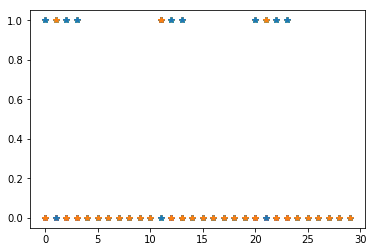

In [0]:
import matplotlib.pyplot as plt
plt.plot(X_binarised_train[0].T, "*")
plt.show()

##MP Neuron Model (McCulloch-Pitts Neuron Model)

 *Proposed by Warren McCulloch and Walter Pitts in 1943, this model imitates the functionality of a biological neuron, thus is also called Artificial Neuron. An artificial neuron accepts binary inputs and produces a binary output based on a certain threshold value which can be adjusted. This can be mainly used for classification problems.
On taking various inputs the function aggregates them and takes decision based on the aggregation. Aggregation simply means sum of these binary inputs. If the aggregated value exceeds the threshold, the output is 1 else it is 0.*

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      #print(self.b, accuracy[b])
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    return accuracy[best_b]
    
    #print('Optimal value of b is', best_b)
    #print('Highest accuracy is', accuracy[best_b])

In [0]:
def train_test_accuracy(input_X, input_Y):
    mp_neuron = MPNeuron()
    return mp_neuron.fit(input_X, input_Y)

In [0]:
train_accuracy = []
for i in range(len(X_train_multi)):
  train_accuracy.append(train_test_accuracy(X_binarised_train[i], Y_train_multi[i]))
  
print(train_accuracy, type(train_accuracy))

[0.91796875, 0.9130434782608695, 0.9120879120879121, 0.9178403755868545] <class 'list'>


In [0]:
test_accuracy = []
for i in range(len(X_train_multi)):
  test_accuracy.append(train_test_accuracy(X_binarised_test[i], Y_test_multi[i]))
  
print(test_accuracy, type(test_accuracy))

[0.9473684210526315, 0.9651162790697675, 0.956140350877193, 0.9300699300699301] <class 'list'>


## Plotting Accuracy versus parameters (train_test_split)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

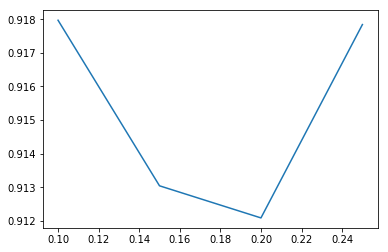

In [0]:
plt.plot(train_test_split_values, train_accuracy)
plt.show()

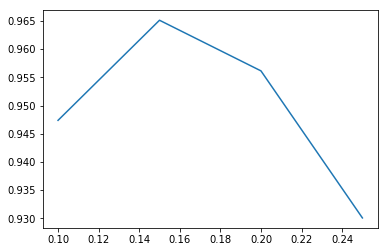

In [0]:
plt.plot(train_test_split_values, test_accuracy)
plt.show()

## Perceptron Model

*This model was developed by Frank Rosenblatt in 1957. This is a slightly tweaked version of the Artificial Neuron model we saw earlier. Here, the neurons are also called Linear Threshold Unit (LTU). This model can work on non-boolean values where each input connection gets associated with a weight. Here the function calculates the weighted sum and based on the threshold value provided, it gives a binary output.*


1.   Both, MP Neuron Model as well as the Perceptron model work on linearly separable data.
2.   MP Neuron Model only accepts boolean input whereas Perceptron Model can process any real input.
3.   Inputs aren’t weighted in MP Neuron Model, which makes this model less flexible. On the other hand, Perceptron model can take weights with respective to inputs provided.
4.  While using both the models we can adjust threshold input to make the model fit our the dataset.

In [0]:
import numpy as np
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs=1, lr = 1):
    
    #self.w = np.ones(X.shape[1])
    np.random.seed(40)
    self.w = np.random.randint(1, 1000, X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
      
      wt_matrix.append(self.w)
      
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
    
    print(max_accuracy)
      
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
    
    return max_accuracy, np.array(wt_matrix)   

In [0]:
perceptron = Perceptron()

In [0]:
X_train_multi[0] = X_train_multi[0].values
X_train_multi[1] = X_train_multi[1].values
X_train_multi[2] = X_train_multi[2].values
X_train_multi[3] = X_train_multi[3].values
X_test_multi[0] = X_test_multi[0].values
X_test_multi[1] = X_test_multi[1].values
X_test_multi[2] = X_test_multi[2].values
X_test_multi[3] = X_test_multi[3].values

0.75


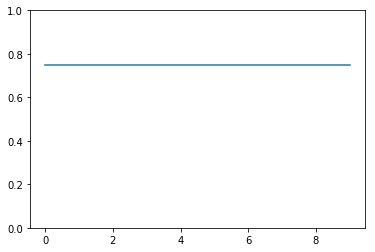

0.763671875


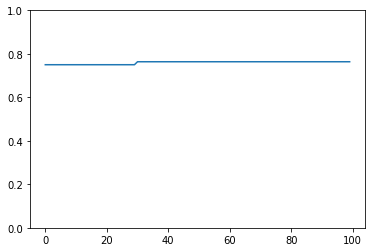

0.908203125


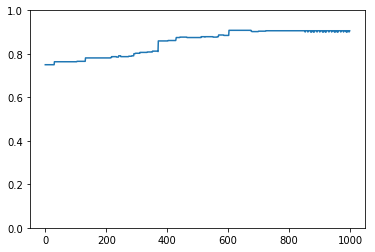

0.9375


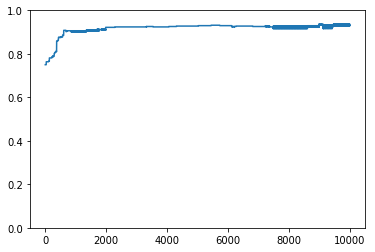

[0.75, 0.763671875, 0.908203125, 0.9375]


In [0]:
epochs = [10, 100, 1000, 10000]
train_accuracy = []
for i in range(len(epochs)):
  result = perceptron.fit(X_train_multi[0], Y_train_multi[0], epochs[i], lr = 0.01)[0]
  train_accuracy.append(result)
  
print(train_accuracy)

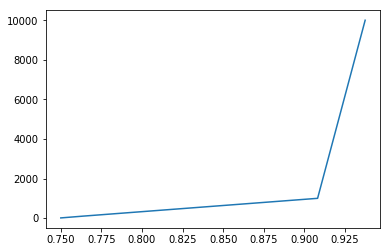

In [0]:
plt.plot(train_accuracy, epochs)
plt.show()

0.9375


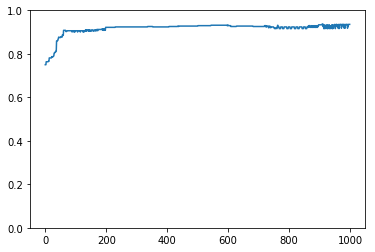

0.908203125


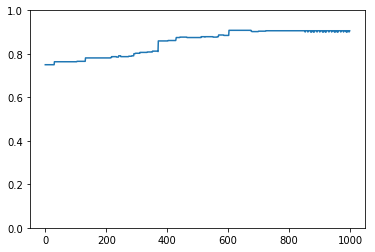

0.763671875


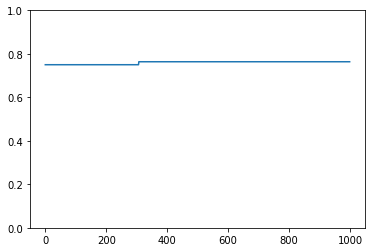

0.75


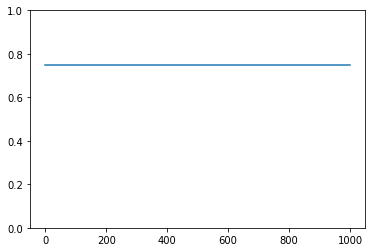

[0.9375, 0.908203125, 0.763671875, 0.75]


In [0]:
lr_list = [0.1, 0.01, 0.001, 0.0001]
train_accuracy = []
for i in range(len(lr_list)):
  result = perceptron.fit(X_train_multi[0], Y_train_multi[0], 1000, lr_list[i])[0]
  train_accuracy.append(result)
  
print(train_accuracy)

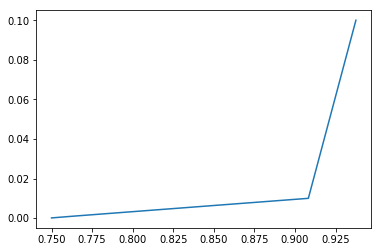

In [0]:
plt.plot(train_accuracy, lr_list)
plt.show()

0.9375


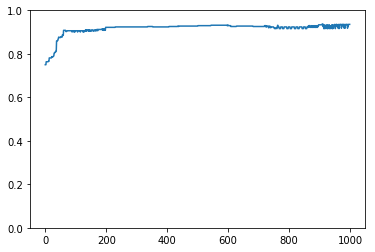

(0.9375,
 array([[ 3.240e+02,  2.154e+02,  5.500e+00, ...,  8.610e+02,  5.010e+02,
          6.170e+02],
        [ 3.210e+02,  2.108e+02,  3.000e+00, ...,  8.610e+02,  5.010e+02,
          6.170e+02],
        [ 3.180e+02,  2.062e+02,  5.000e-01, ...,  8.610e+02,  5.010e+02,
          6.170e+02],
        ...,
        [ 6.000e-01, -4.000e-01, -5.560e+01, ...,  8.610e+02,  5.010e+02,
          6.170e+02],
        [ 7.000e-01, -4.000e-01, -5.540e+01, ...,  8.610e+02,  5.010e+02,
          6.170e+02],
        [ 6.000e-01, -3.000e-01, -5.540e+01, ...,  8.610e+02,  5.010e+02,
          6.170e+02]]))

In [0]:
perceptron.fit(X_train_multi[0], Y_train_multi[0], 1000, 0.1)

In [0]:
Y_pred_train = perceptron.predict(X_train_multi[1])
print(accuracy_score(Y_pred_train, Y_train_multi[1]))

0.9358178053830227


In [0]:
Y_pred_test = perceptron.predict(X_test_multi[1])
print(accuracy_score(Y_pred_test, Y_test_multi[1]))

0.9418604651162791


##Animation of the plots

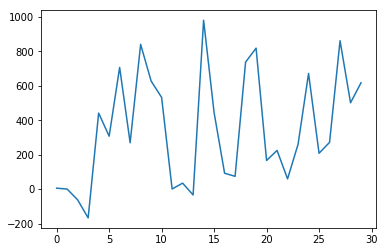

In [0]:
plt.plot(perceptron.w)
plt.show()

In [0]:
perceptron = Perceptron()

0.9375


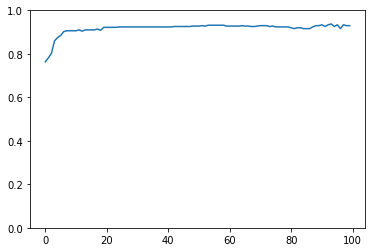

In [0]:
wt_matrix = perceptron.fit(X_train_multi[0], Y_train_multi[0], 100)[1]

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

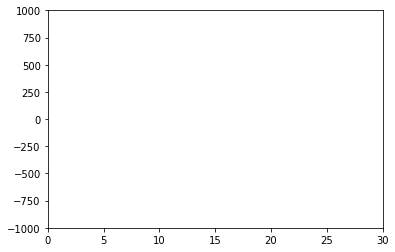

In [0]:
fig, ax = plt.subplots()

ax.set_xlim((0, wt_matrix.shape[1]))
ax.set_ylim((-1000, 1000))

line, = ax.plot([], [], lw=2)

In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [0]:
HTML(anim.to_html5_video())



*   Animate the hyperparameter epochs



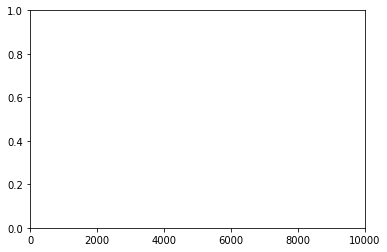

In [0]:
fig, ax = plt.subplots()

ax.set_xlim((0, 10000))
ax.set_ylim((0, 1))

line, = ax.plot([], [], lw=2)

In [0]:
print(epochs)
print(train_accuracy)
def animate(i):
    x = epochs
    y = train_accuracy
    line.set_data(x, y)
    return (line,)

[10, 100, 1000, 10000]
[0.9375, 0.908203125, 0.763671875, 0.75]


In [0]:
anim = animation.FuncAnimation(fig, animate, frames=4, interval=200, blit=True)

In [0]:
HTML(anim.to_html5_video())